# ANALYSIS ON ROSE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 

#  Read the data as an appropriate Time Series data and plot the data.

In [2]:
# Read the data Rose.csv
df1 = pd.read_csv('Rose.csv')

In [3]:
df1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df1.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [5]:
df1.shape

(187, 2)

In [6]:
Date = pd.date_range(start='01-01-1980',end = '08-01-1995', freq='M')
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df1['Date'] = Date

In [8]:
df1.head()

,YearMonth,Rose,Date
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    object        
 1   Rose       185 non-null    float64       
 2   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


In [10]:
df1.drop('YearMonth', axis=1, inplace=True)

In [11]:
df1.set_index('Date', inplace=True)

In [12]:
df1.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [13]:
df1.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Date', length=187, freq=None)

In [14]:
df1.index.freq = 'M'
df1.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Date', length=187, freq='M')

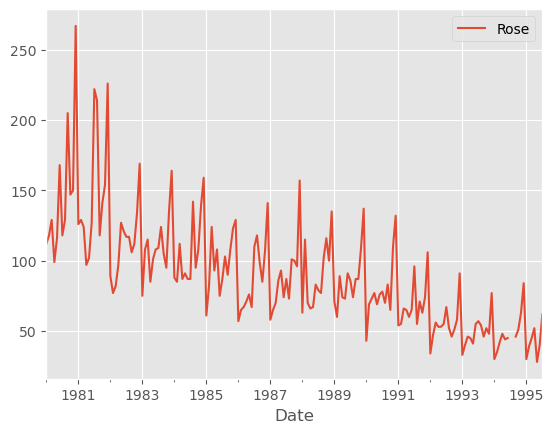

In [15]:
df1.plot();

#  Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [16]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Rose,185.0,90.394595,39.175344,28.0,63.0,86.0,112.0,267.0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [18]:
df1.isnull().sum()

Rose    2
dtype: int64

## Mean and Median of Rose wine sale in 20th century

In [19]:
# mean of the time series
df1.mean()

Rose    90.394595
dtype: float64

In [20]:
# median of the time series
df1.median()

Rose    86.0
dtype: float64

## Box plot

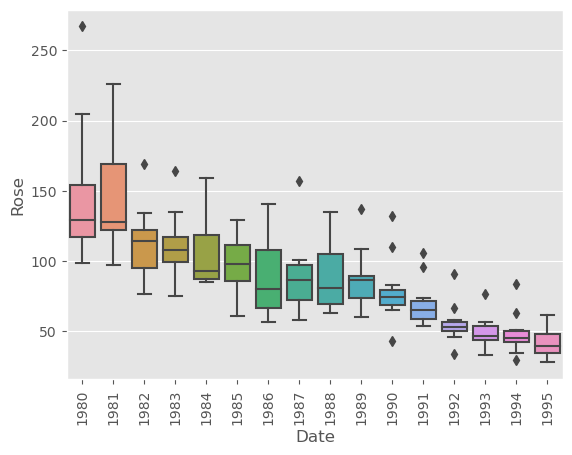

In [21]:
# boxplot of data for each year with year labels at 90 degree angle
sns.boxplot(data=df1, x=df1.index.year, y='Rose')
plt.xticks(rotation=90);

## Boxplot for each Calendar month across years

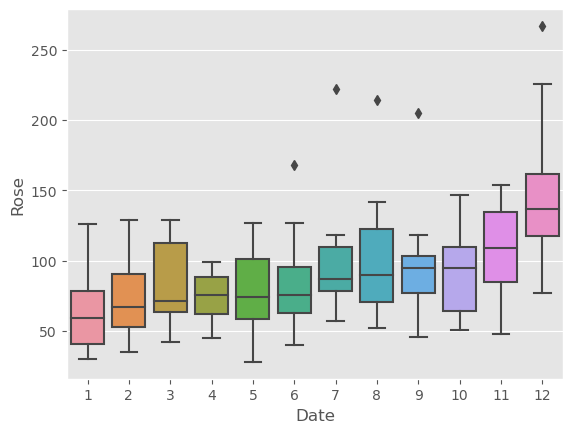

In [22]:
# boxplot for each month
sns.boxplot(data=df1, x=df1.index.month, y='Rose');

## monthplot of the Time Series

In [23]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

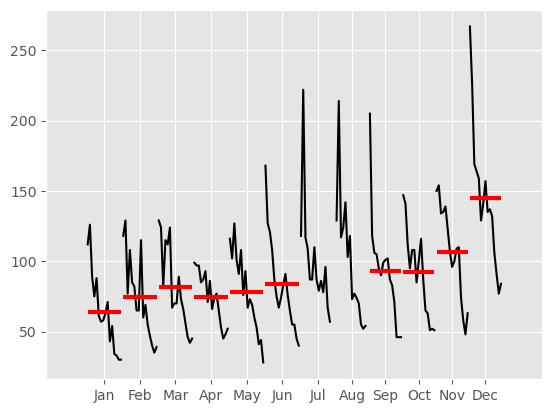

In [24]:
# month plot for the time series data
month_plot(df1['Rose']);

In [25]:
month_sales_years = pd.pivot_table(df1,values='Rose', columns=df1.index.month_name(), index=df1.index.year)
month_sales_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


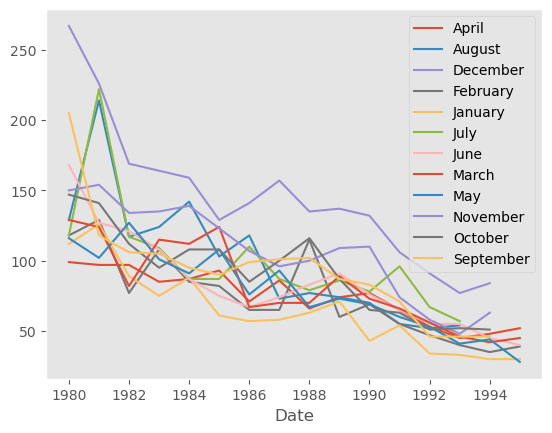

In [26]:
month_sales_years.plot()
plt.grid()
plt.legend(loc='best');

## Conversion of Data to other periodicity (Resampling)

In [27]:
df1_year = df1.resample('A').sum()
df1_year.head()

,Rose
Date,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


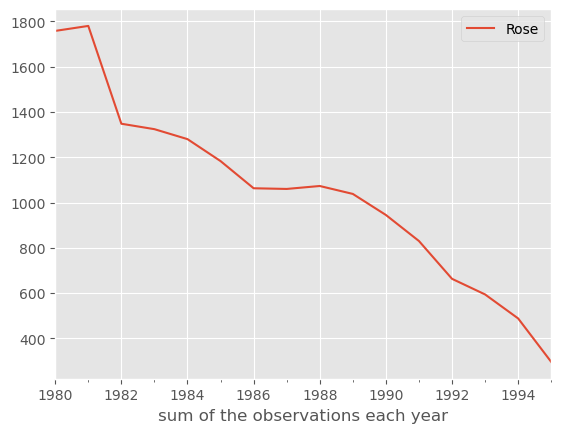

In [28]:
df1_year.plot();
plt.xlabel('sum of the observations each year');

In [29]:
df1_yearly_mean = df1.resample('Y').mean()
df1_yearly_mean.head()

,Rose
Date,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


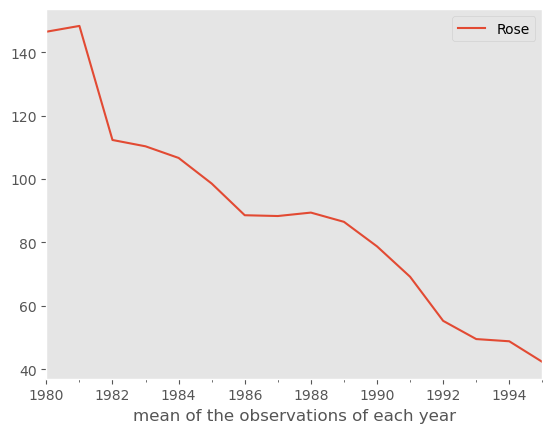

In [30]:
df1_yearly_mean.plot()
plt.grid()
plt.xlabel('mean of the observations of each year');

In [31]:
# resample the data to quarterly frequency and calculate the sum for each quarter
quarterly_sale_df1 = df1.resample(rule='Q').sum()
quarterly_sale_df1.head()

,Rose
Date,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


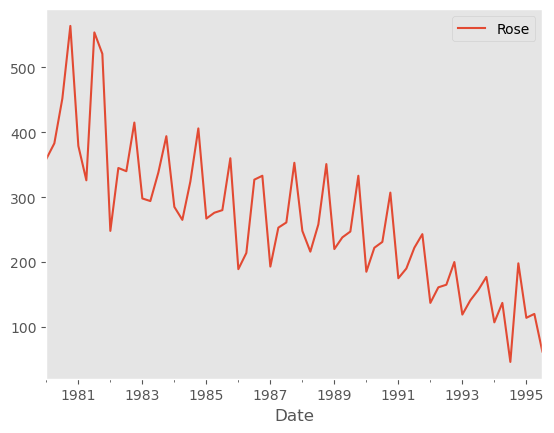

In [32]:
# plot the quarterly data as a quarter plot
quarterly_sale_df1.plot();
plt.grid()

In [33]:
quarterly_sale_df1_mean = df1.resample(rule='Q').mean()
quarterly_sale_df1_mean.head()

,Rose
Date,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


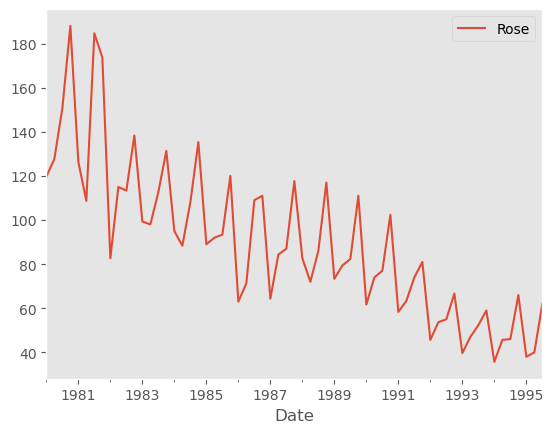

In [34]:
quarterly_sale_df1_mean.plot();
plt.grid()

In [35]:
df1_daily_sale = df1.resample('D').sum()
df1_daily_sale

,Rose
Date,
1980-01-31,112.0
1980-02-01,0.0
1980-02-02,0.0
1980-02-03,0.0
1980-02-04,0.0
...,...
1995-07-27,0.0
1995-07-28,0.0
1995-07-29,0.0


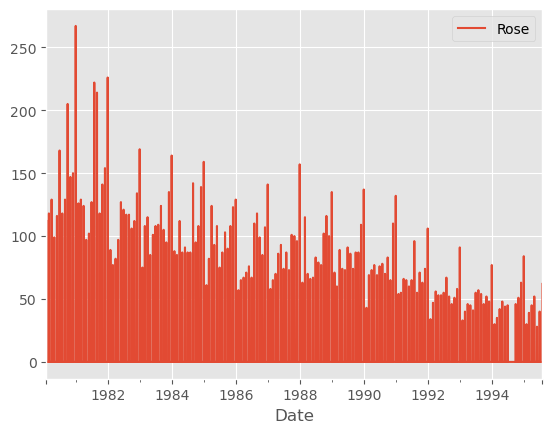

In [36]:
df1_daily_sale.plot();

In [37]:
df1_decade_sale = df1.resample('10y').sum()
df1_decade_sale.head()

,Rose
Date,
1980-12-31,1758.0
1990-12-31,12094.0
2000-12-31,2871.0


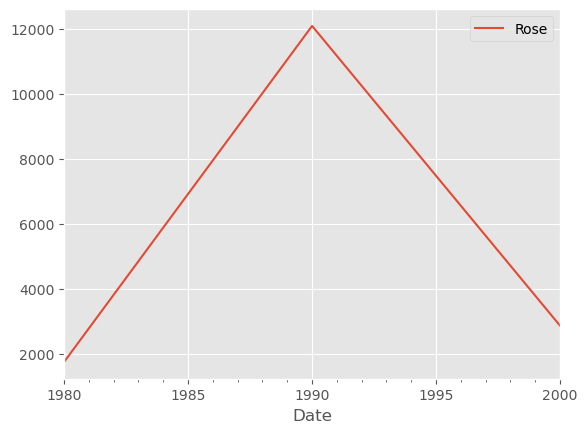

In [38]:
df1_decade_sale.plot();

## Time Series Decomposition

# Additive Model

In [39]:
df1.isnull().sum()

Rose    2
dtype: int64

In [40]:
df1[df1['Rose'].isnull()]

,Rose
Date,
1994-07-31,NaN
1994-08-31,NaN


In [41]:
# interpolate using spline method with order 3
df1.interpolate(method='spline', order=3,inplace=True)

In [42]:
df1[df1['Rose'].isnull()]

,Rose
Date,


In [43]:
df1.isnull().sum()

Rose    0
dtype: int64

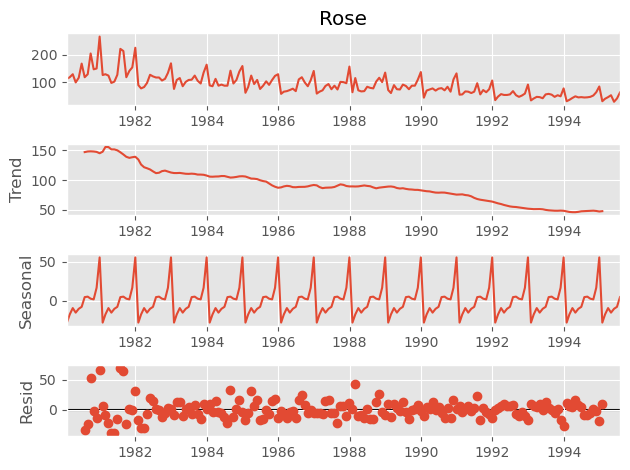

In [44]:
# decompose time series components using additive model & plot the components
from statsmodels.tsa.seasonal import seasonal_decompose
df1_seas_decom = seasonal_decompose(df1['Rose'], model='additive')
df1_seas_decom.plot();

In [45]:
# extract the trend component and print the first 12 rows
df1_seas_decom.trend.head(12)

Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64

In [46]:
df1_seas_decom.trend.tail(12)

Date
1994-08-31    48.168328
1994-09-30    48.459995
1994-10-31    48.751662
1994-11-30    48.251662
1994-12-31    47.376662
1995-01-31    47.931117
1995-02-28          NaN
1995-03-31          NaN
1995-04-30          NaN
1995-05-31          NaN
1995-06-30          NaN
1995-07-31          NaN
Freq: M, Name: trend, dtype: float64

In [47]:
# extract the seasonal component and print the first 12 rows
df1_seas_decom.seasonal.head(12)

Date
1980-01-31   -27.892252
1980-02-29   -17.422041
1980-03-31    -9.268252
1980-04-30   -15.080752
1980-05-31   -10.178966
1980-06-30    -7.661109
1980-07-31     4.803952
1980-08-31     5.426762
1980-09-30     2.791081
1980-10-31     1.888304
1980-11-30    16.863304
1980-12-31    55.729970
Freq: M, Name: seasonal, dtype: float64

In [48]:
df1_seas_decom.seasonal.tail(12)

Date
1994-08-31     5.426762
1994-09-30     2.791081
1994-10-31     1.888304
1994-11-30    16.863304
1994-12-31    55.729970
1995-01-31   -27.892252
1995-02-28   -17.422041
1995-03-31    -9.268252
1995-04-30   -15.080752
1995-05-31   -10.178966
1995-06-30    -7.661109
1995-07-31     4.803952
Freq: M, Name: seasonal, dtype: float64

In [49]:
# output the min and max seasonal component values
df1_seas_decom.seasonal.min(), df1_seas_decom.seasonal.max()

(-27.89225204664787, 55.729970175574344)

In [50]:
df1_seas_decom.resid.head(12)

Date
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.887286
1980-08-31   -24.551762
1980-09-30    53.833919
1980-10-31    -2.971637
1980-11-30   -14.279970
1980-12-31    66.145030
Freq: M, Name: resid, dtype: float64

In [51]:
df1_seas_decom.resid.tail(12)

Date
1994-08-31    -9.268213
1994-09-30    -5.251076
1994-10-31     0.360035
1994-11-30    -2.114965
1994-12-31   -19.106632
1995-01-31     9.961135
1995-02-28          NaN
1995-03-31          NaN
1995-04-30          NaN
1995-05-31          NaN
1995-06-30          NaN
1995-07-31          NaN
Freq: M, Name: resid, dtype: float64

In [52]:
df1_seas_decom.resid.mean()

-0.08008095655101591

## De-Seasonalized Time Series

In [53]:
# time series values minus the seasonal component
df1_de_TS = df1['Rose'] - df1_seas_decom.seasonal
df1_de_TS.head(12)

Date
1980-01-31    139.892252
1980-02-29    135.422041
1980-03-31    138.268252
1980-04-30    114.080752
1980-05-31    126.178966
1980-06-30    175.661109
1980-07-31    113.196048
1980-08-31    123.573238
1980-09-30    202.208919
1980-10-31    145.111696
1980-11-30    133.136696
1980-12-31    211.270030
Freq: M, dtype: float64

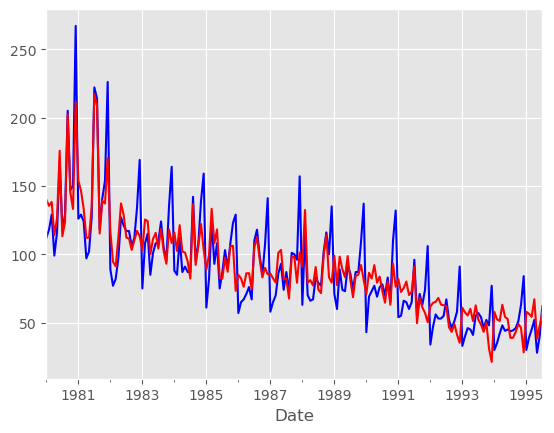

In [54]:
# plot the actual time series and the deseasonalized time series in different colors in the same plot
df1['Rose'].plot(label = 'Actual', color='blue')
df1_de_TS.plot(label = 'Deseasonalized', color='red');

# Multiplicative Model

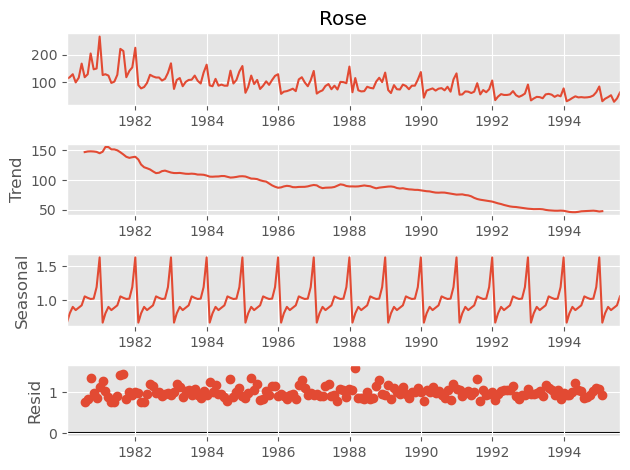

In [55]:
# decompose time series using multiplicative model
df1_decom_mult = seasonal_decompose(df1['Rose'], model='multiplicative')
df1_decom_mult.plot();

In [56]:
# extract the trend component and print the first 12 rows
df1_decom_mult.trend.head(12)

Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64

In [57]:
# extract the trend component and print the last 12 rows
df1_decom_mult.trend.tail(12)

Date
1994-08-31    48.168328
1994-09-30    48.459995
1994-10-31    48.751662
1994-11-30    48.251662
1994-12-31    47.376662
1995-01-31    47.931117
1995-02-28          NaN
1995-03-31          NaN
1995-04-30          NaN
1995-05-31          NaN
1995-06-30          NaN
1995-07-31          NaN
Freq: M, Name: trend, dtype: float64

In [58]:
# extract the seasonal component and print the first 12 rows
df1_decom_mult.seasonal.head(12)

Date
1980-01-31    0.670320
1980-02-29    0.806375
1980-03-31    0.901501
1980-04-30    0.854411
1980-05-31    0.889760
1980-06-30    0.924324
1980-07-31    1.056071
1980-08-31    1.034338
1980-09-30    1.017959
1980-10-31    1.022915
1980-11-30    1.192781
1980-12-31    1.629244
Freq: M, Name: seasonal, dtype: float64

In [59]:
# extract the seasonal component and print the last 12 rows
df1_decom_mult.seasonal.tail(12)

Date
1994-08-31    1.034338
1994-09-30    1.017959
1994-10-31    1.022915
1994-11-30    1.192781
1994-12-31    1.629244
1995-01-31    0.670320
1995-02-28    0.806375
1995-03-31    0.901501
1995-04-30    0.854411
1995-05-31    0.889760
1995-06-30    0.924324
1995-07-31    1.056071
Freq: M, Name: seasonal, dtype: float64

In [60]:
# extract the resid component and print the first 12 rows
df1_decom_mult.resid.head(12)

Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.759671
1980-08-31    0.841974
1980-09-30    1.357259
1980-10-31    0.970446
1980-11-30    0.853069
1980-12-31    1.129231
Freq: M, Name: resid, dtype: float64

In [61]:
# extract the resid component and print the last 12 rows
df1_decom_mult.resid.tail(12)

Date
1994-08-31    0.889699
1994-09-30    0.932490
1994-10-31    1.022683
1994-11-30    1.094631
1994-12-31    1.088250
1995-01-31    0.933730
1995-02-28         NaN
1995-03-31         NaN
1995-04-30         NaN
1995-05-31         NaN
1995-06-30         NaN
1995-07-31         NaN
Freq: M, Name: resid, dtype: float64

In [62]:
# check the mean of the residual component. It should be close to zero for multiplicative model
df1_decom_mult.resid.mean()

0.9994710128519414

#  Split the data into training and test. The test data should start in 1991.

In [63]:
train = df1[df1.index.year<1991]
test = df1[df1.index.year>=1991]

In [64]:
train.shape, test.shape

((132, 1), (55, 1))

In [65]:
display(train.head())
display(train.tail())

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


,Rose
Date,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [66]:
display(test.head())
display(test.tail())

,Rose
Date,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


,Rose
Date,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


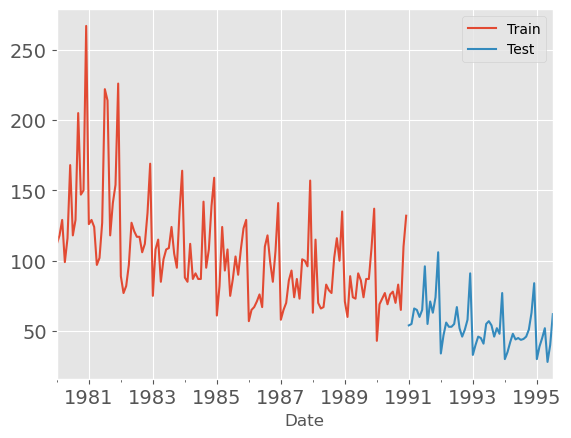

In [67]:
train['Rose'].plot(legend = True, label = 'Train', fontsize =14)
test['Rose'].plot(legend = True,label = 'Test', fontsize = 14);

#  Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Building different models and comparing the accuracy metrics.

## model 1: Liner regression

## model 2: Naive approach

## method 3:Simple average

## method 4: Moving average(MA)

## method 5: Simple exponential smoothing

## method 6: Double exponential smoothing(Holt's model)

## method 7: Triple exponential smoothing (Holt- winter's model)

# model 1: Liner regression

In [68]:
train_time = [i+1 for i in range(len(train))] 
test_time = [i+43 for i in range(len(test))] 
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [69]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [70]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [71]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

,Rose,time
Date,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


,Rose,time
Date,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


In [72]:
display(LinearRegression_test.head())
display(LinearRegression_test.tail())

,Rose,time
Date,,
1991-01-31,54.0,43
1991-02-28,55.0,44
1991-03-31,66.0,45
1991-04-30,65.0,46
1991-05-31,60.0,47


,Rose,time
Date,,
1995-03-31,45.0,93
1995-04-30,52.0,94
1995-05-31,28.0,95
1995-06-30,40.0,96
1995-07-31,62.0,97


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose']) 

LinearRegression()

In [76]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [77]:
LinearRegression_test.head(12)

,Rose,time,RegOnTime
Date,,,
1991-01-31,54.0,43,116.557274
1991-02-28,55.0,44,116.062896
1991-03-31,66.0,45,115.568518
1991-04-30,65.0,46,115.074140
1991-05-31,60.0,47,114.579762
1991-06-30,65.0,48,114.085384
1991-07-31,96.0,49,113.591006
1991-08-31,55.0,50,113.096629
1991-09-30,71.0,51,112.602251


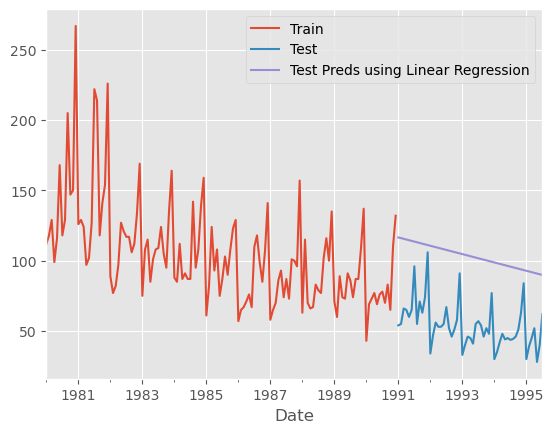

In [78]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

## Accuracy metrics

In [79]:
from statsmodels.tools.eval_measures import rmse 

## Model Evaluation

In [80]:
## Test Data - RMSE

rmse_model1_test = rmse(test['Rose'],test_predictions_model1)
rmse_model1_test

51.48684260153627

In [81]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,51.486843


# Model 2: Naive Approach:

In [82]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [83]:
NaiveModel_test['naive'] = train['Rose'][len(train['Rose'])-1] 
# picking out the last value in train dataset

In [84]:
NaiveModel_test['naive'].head()

Date
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: M, Name: naive, dtype: float64

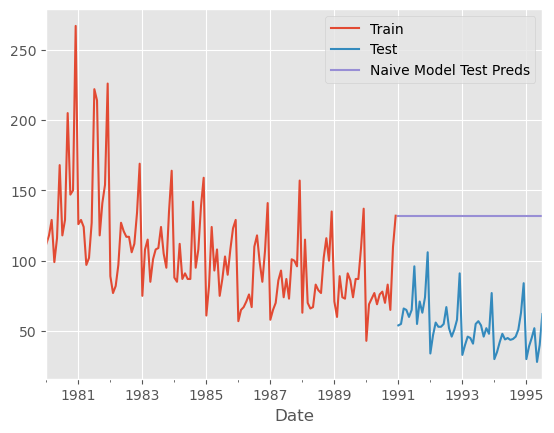

In [85]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

## Model Evaluation

In [86]:
## Test Data - RMSE

rmse_model2_test=rmse(test['Rose'],NaiveModel_test['naive'])
rmse_model2_test

79.77806619469453

In [87]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066


# Method 3: Simple Average

In [88]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [89]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Date,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


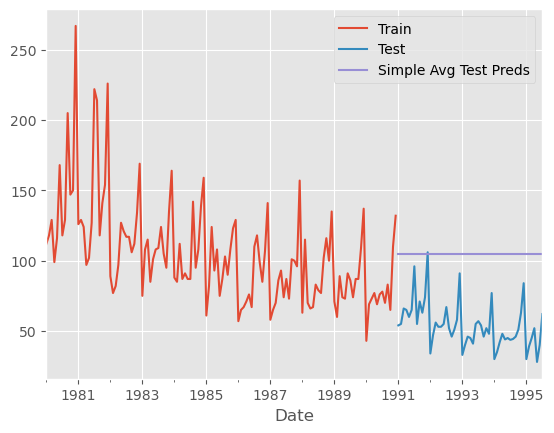

In [90]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,label= 'Simple Avg Test Preds');

## Model Evaluation¶

In [91]:
## Test Data - RMSE 

rmse_model3_test = rmse(test['Rose'], SimpleAverage_test['mean_forecast'])
rmse_model3_test

53.52155715428721

In [92]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557


# Method 4: Moving Average(MA)

In [93]:
MovingAverage = df1.copy()
MovingAverage.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


## Trailing moving averages

In [94]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


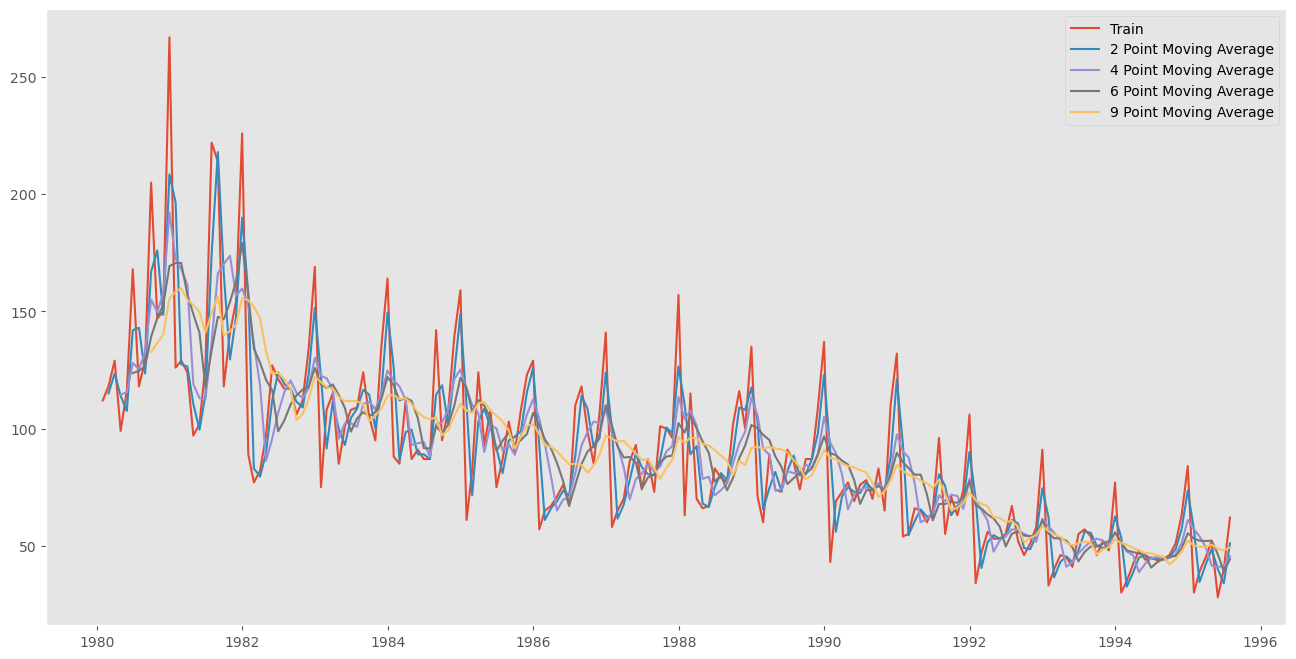

In [95]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [96]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df1.index.year<1991] 
trailing_MovingAverage_test=MovingAverage[df1.index.year>=1991]

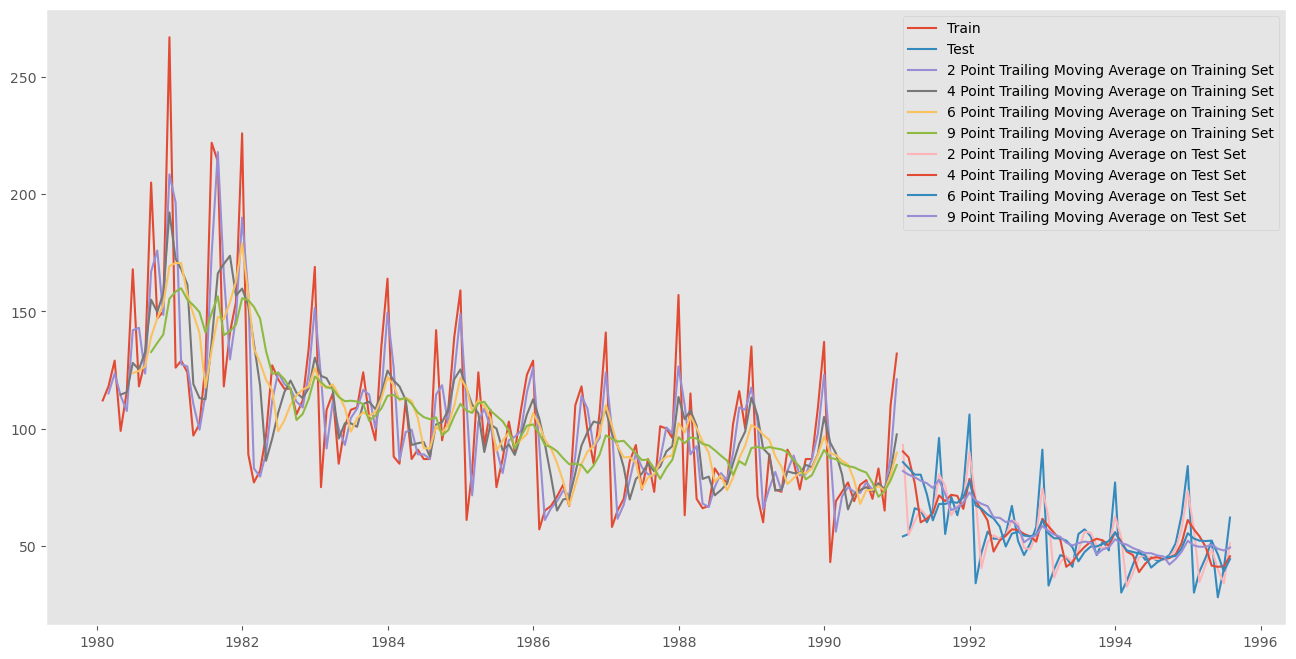

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

## Model Evaluation

In [98]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = rmse(test['Rose'],
                          trailing_MovingAverage_test['Trailing_2'])
rmse_model4_test_2

11.53017959780346

In [99]:
## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = rmse(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
rmse_model4_test_4

14.462329946639356

In [100]:
## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = rmse(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
rmse_model4_test_6

14.5869157725431

In [101]:
## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = rmse(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
rmse_model4_test_9

14.740111675183757

In [102]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, 
                                          rmse_model4_test_4,
                                          rmse_model4_test_6, 
                                          rmse_model4_test_9]}, 
                           index=['2pointTrailingMovingAverage',
                                  '4pointTrailingMovingAverage', 
                                  '6pointTrailingMovingAverage',
                                  '9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112


## let us plot all the models and compare the Time Series plots

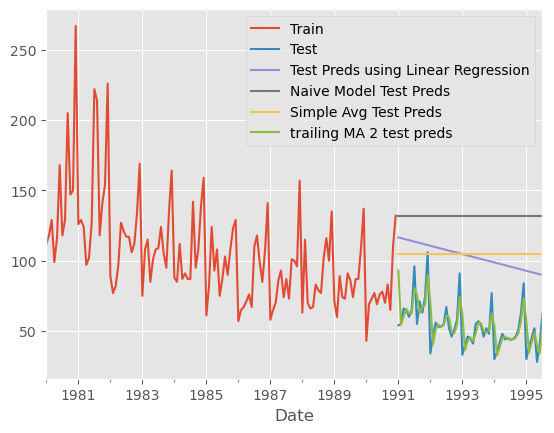

In [103]:
train['Rose'].plot(legend = True, label = 'Train')

test['Rose'].plot(legend = True, label = 'Test')

LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, 
                              label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');

# Method 5: Simple Exponential Smoothing

In [104]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [105]:
SES_train = train.copy()
SES_test = test.copy()

In [106]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [107]:
model_SES_autofit = model_SES.fit(optimized=True)

In [108]:
model_SES_autofit.params

{'smoothing_level': 0.0987499363908956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38688235486416,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [109]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test)).round(0)
SES_test.head()

,Rose,predict
Date,,
1991-01-31,54.0,87.0
1991-02-28,55.0,87.0
1991-03-31,66.0,87.0
1991-04-30,65.0,87.0
1991-05-31,60.0,87.0


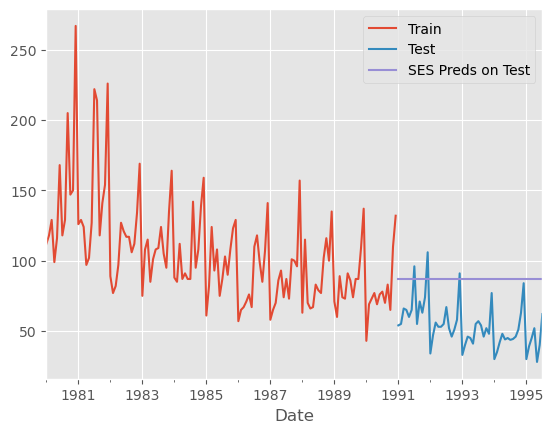

In [110]:
SES_train['Rose'].plot(legend=True, label = 'Train')
SES_test['Rose'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

## Model Evaluation for Simple Exponential Smoothing

In [111]:
## Test Data

rmse_model5_test_1 = rmse(SES_test['Rose'],SES_test['predict'])
rmse_model5_test_1

36.763738599307196

In [112]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},
                           index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739


In [113]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [114]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9] 

In [115]:
for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues.round(0)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test)).round(0)
    
    rmse_model5_train_i = np.round(rmse(SES_train['Rose'],SES_train['predict',i]),0)
    
    rmse_model5_test_i = np.round(rmse(SES_test['Rose'],SES_test['predict',i]),0)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,
                                      'Train RMSE': rmse_model5_train_i,
                                      'Test RMSE':rmse_model5_test_i}, 
                                     ignore_index=True)

In [116]:
SES_test.head()

,Rose,predict,"(predict, 0.3)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7)","(predict, 0.8)","(predict, 0.9)"
Date,,,,,,,,,
1991-01-31,54.0,87.0,99.0,105.0,111.0,117.0,122.0,126.0,129.0
1991-02-28,55.0,87.0,99.0,105.0,111.0,117.0,122.0,126.0,129.0
1991-03-31,66.0,87.0,99.0,105.0,111.0,117.0,122.0,126.0,129.0
1991-04-30,65.0,87.0,99.0,105.0,111.0,117.0,122.0,126.0,129.0
1991-05-31,60.0,87.0,99.0,105.0,111.0,117.0,122.0,126.0,129.0


## Model Evaluation

In [117]:
resultsDf_6.round(1)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.0,48.0
1,0.4,33.0,54.0
2,0.5,34.0,59.0
3,0.6,34.0,65.0
4,0.7,35.0,70.0
5,0.8,36.0,74.0
6,0.9,37.0,77.0


In [118]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.0,48.0
1,0.4,33.0,54.0
2,0.5,34.0,59.0
3,0.6,34.0,65.0
4,0.7,35.0,70.0
5,0.8,36.0,74.0
6,0.9,37.0,77.0


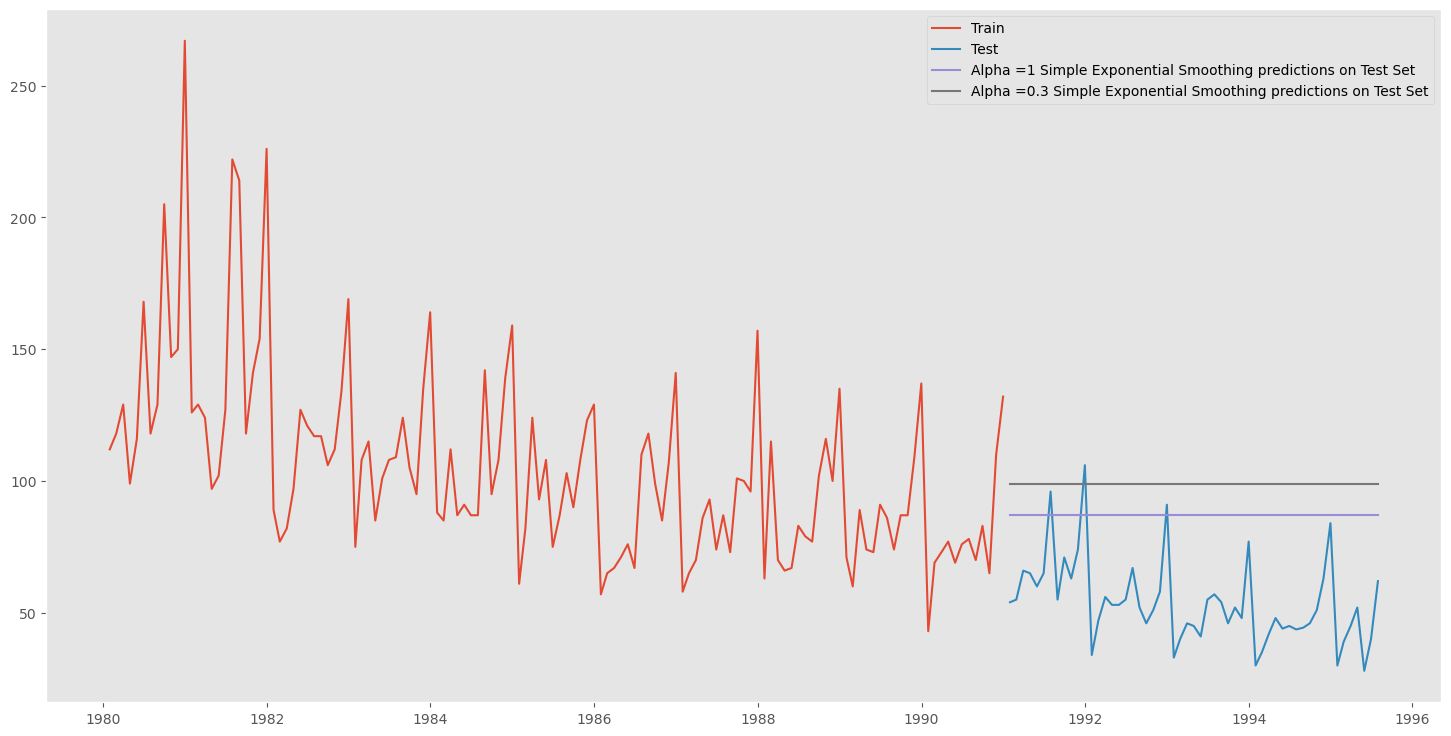

In [119]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [120]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],
 ascending=True).values[0][2]]},
                             index = ['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000


# Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [121]:
DES_train = train.copy()
DES_test = test.copy()

In [122]:
model_DES = Holt(DES_train['Rose'])

Identifying Optimum Values of 𝛼 & 𝛽

In [123]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [124]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [125]:
for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = rmse(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = rmse(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,
                                          'Beta Values':j,
                                          'Train RMSE': rmse_model6_train,
                                          'Test RMSE': rmse_model6_test}, ignore_index=True)

In [126]:
resultsDf_7.round(1)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.9,265.6
1,0.3,0.4,37.4,358.8
2,0.3,0.5,38.8,451.9
3,0.3,0.6,40.2,537.0
4,0.3,0.7,41.3,601.7
...,...,...,...,...
59,1.0,0.6,51.8,801.8
60,1.0,0.7,54.5,842.0
61,1.0,0.8,57.4,854.0
62,1.0,0.9,60.5,834.8


In [127]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.928003,265.639892
8,0.4,0.3,36.733732,339.378769
1,0.3,0.4,37.356026,358.823468
16,0.5,0.3,37.424080,394.344818
24,0.6,0.3,38.343309,439.368192


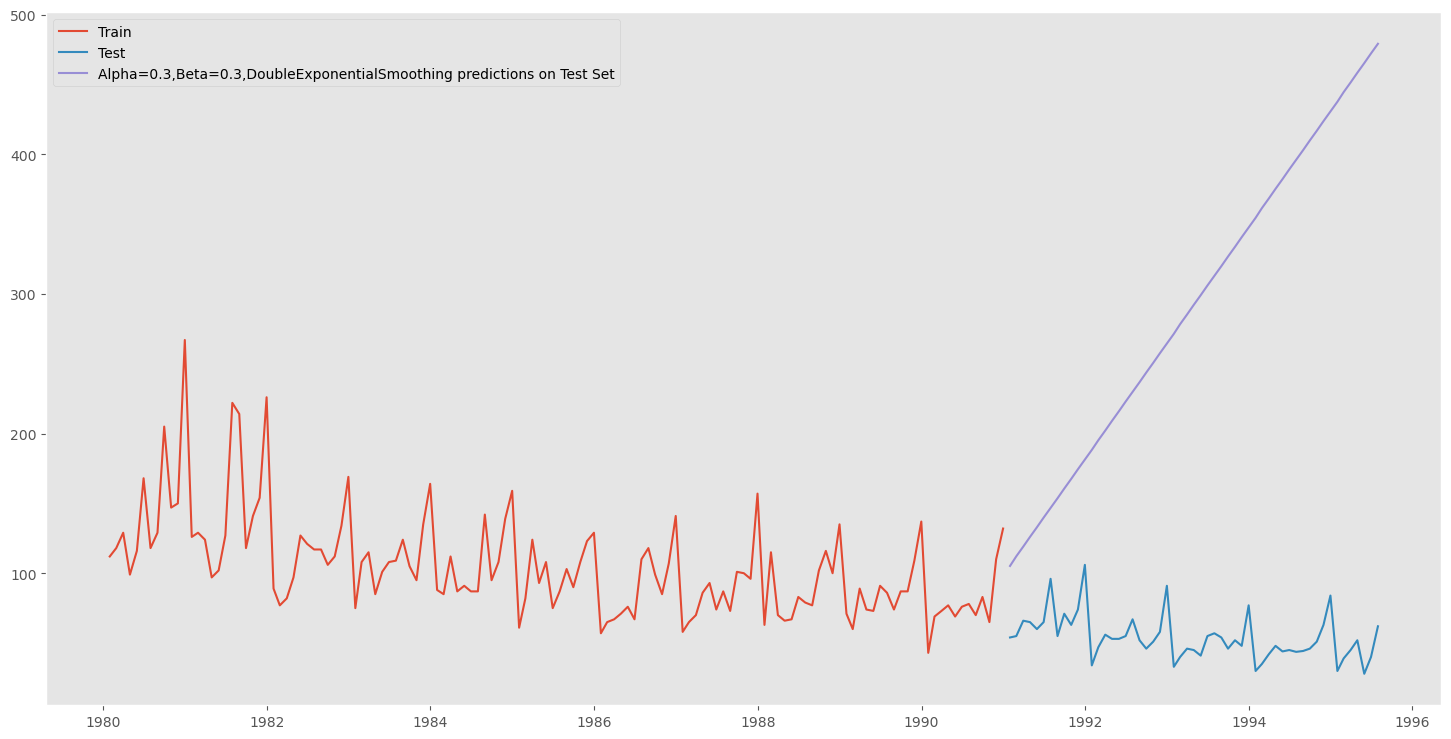

In [128]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3],
         label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [129]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [130]:
TES_train = train.copy()
TES_test = test.copy()

In [131]:
model_TES = ExponentialSmoothing(TES_train['Rose'],
                                 trend='additive',
                                 seasonal='multiplicative',freq='M')

In [132]:
model_TES_autofit = model_TES.fit()

In [133]:
model_TES_autofit.params

{'smoothing_level': 0.07043989932631503,
 'smoothing_trend': 0.04650301769213779,
 'smoothing_seasonal': 4.039590252509318e-06,
 'damping_trend': nan,
 'initial_level': 146.61279022991906,
 'initial_trend': -0.8811320443785916,
 'initial_seasons': array([0.76750223, 0.87046378, 0.95125375, 0.8313741 , 0.93493001,
        1.01837326, 1.11984632, 1.191993  , 1.12850536, 1.10509424,
        1.28822129, 1.77635939]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [134]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)).round(0)

TES_test.head()

,Rose,auto_predict
Date,,
1991-01-31,54.0,56.0
1991-02-28,55.0,64.0
1991-03-31,66.0,69.0
1991-04-30,65.0,61.0
1991-05-31,60.0,68.0


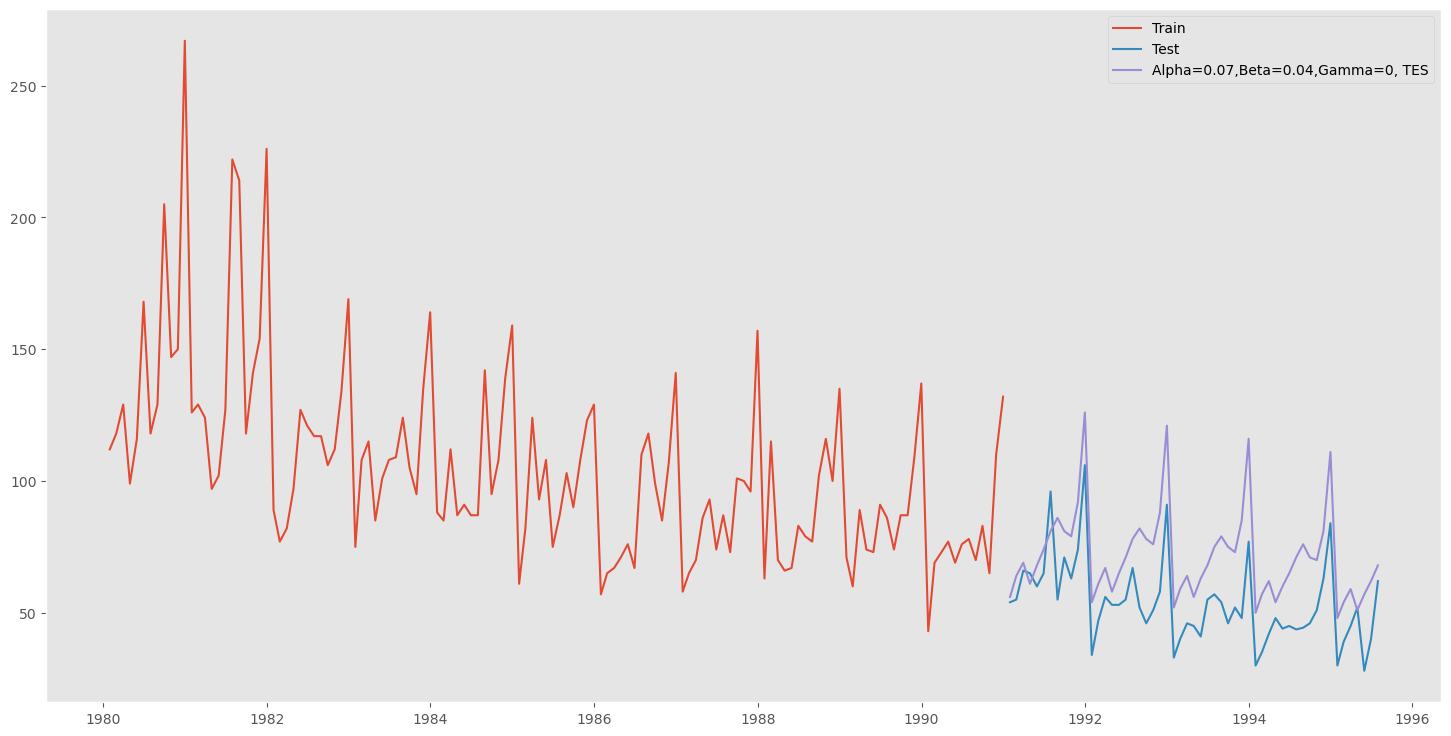

In [135]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.07,Beta=0.04,Gamma=0, TES')

plt.legend(loc='best')
plt.grid();

In [136]:
## Test Data

rmse_model6_test_1 = rmse(TES_test['Rose'],
                          TES_test['auto_predict'])
rmse_model6_test_1

20.424964892944715

In [137]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.07,Beta=0.04,Gamma=0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf.round(0)

,Test RMSE
RegressionOnTime,51.0
NaiveModel,80.0
SimpleAverageModel,54.0
2pointTrailingMovingAverage,12.0
4pointTrailingMovingAverage,14.0
6pointTrailingMovingAverage,15.0
9pointTrailingMovingAverage,15.0
"Alpha=0.098,SimpleExponentialSmoothing",37.0
"Alpha=0.3,SimpleExponentialSmoothing",48.0
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",266.0


Identifying Optimum Values of 𝛼 , 𝛽 and 𝛾

In [138]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],
                              'Beta Values':[],
                              'Gamma Values':[],
                              'Train RMSE':[],
                              'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [139]:
gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [140]:
for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = rmse(TES_train['Rose'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Rose'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\suloc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to co

In [141]:
TES_test.head().round(0)

,Rose,auto_predict,"(predict, 0.3, 0.3, 0.3)","(predict, 0.3, 0.3, 0.4)","(predict, 0.3, 0.3, 0.5)","(predict, 0.3, 0.3, 0.6)","(predict, 0.3, 0.3, 0.7)","(predict, 0.3, 0.3, 0.8)","(predict, 0.3, 0.3, 0.9)","(predict, 0.3, 0.3, 1.0)",...,"(predict, 1.0, 0.9, 0.9)","(predict, 1.0, 0.9, 1.0)","(predict, 1.0, 1.0, 0.3)","(predict, 1.0, 1.0, 0.4)","(predict, 1.0, 1.0, 0.5)","(predict, 1.0, 1.0, 0.6)","(predict, 1.0, 1.0, 0.7)","(predict, 1.0, 1.0, 0.8)","(predict, 1.0, 1.0, 0.9)","(predict, 1.0, 1.0, 1.0)"
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,54.0,56.0,49.0,47.0,45.0,43.0,45.0,48.0,48.0,46.0,...,520.0,-190.0,-848.0,503.0,-4111.0,88.0,-819.0,-0.0,-46.0,-108.0
1991-02-28,55.0,64.0,65.0,63.0,61.0,60.0,65.0,76.0,84.0,87.0,...,-279.0,469.0,-140.0,6074.0,27816.0,93.0,289.0,-45.0,162.0,424.0
1991-03-31,66.0,69.0,69.0,66.0,63.0,59.0,60.0,73.0,80.0,78.0,...,631.0,-224.0,39.0,-1765.0,14047.0,-165.0,468.0,-6.0,-4.0,-273.0
1991-04-30,65.0,61.0,66.0,63.0,58.0,53.0,52.0,69.0,83.0,90.0,...,-37.0,10543.0,147.0,-348.0,3182.0,-862.0,2799.0,7.0,25.0,771.0
1991-05-31,60.0,68.0,64.0,59.0,52.0,43.0,38.0,49.0,60.0,68.0,...,-499.0,37.0,531.0,3576.0,317.0,-157.0,720.0,-17.0,-1.0,65.0


In [142]:
resultsDf_8_2.round(1)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,23.0,20.9
1,0.3,0.3,0.4,24.2,10.1
2,0.3,0.3,0.5,25.7,31.6
3,0.3,0.3,0.6,27.5,73.3
4,0.3,0.3,0.7,28.8,117.7
...,...,...,...,...,...
507,1.0,1.0,0.6,2140.6,6630.7
508,1.0,1.0,0.7,3091.0,9721.2
509,1.0,1.0,0.8,2438.2,2573.8
510,1.0,1.0,0.9,28835.8,3522.9


In [143]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
1,0.3,0.3,0.4,24.209084,10.149434
17,0.3,0.5,0.4,25.873405,10.354672
26,0.3,0.6,0.5,28.141788,10.743882
84,0.4,0.5,0.7,31.193940,13.360454
76,0.4,0.4,0.7,29.933604,17.171177


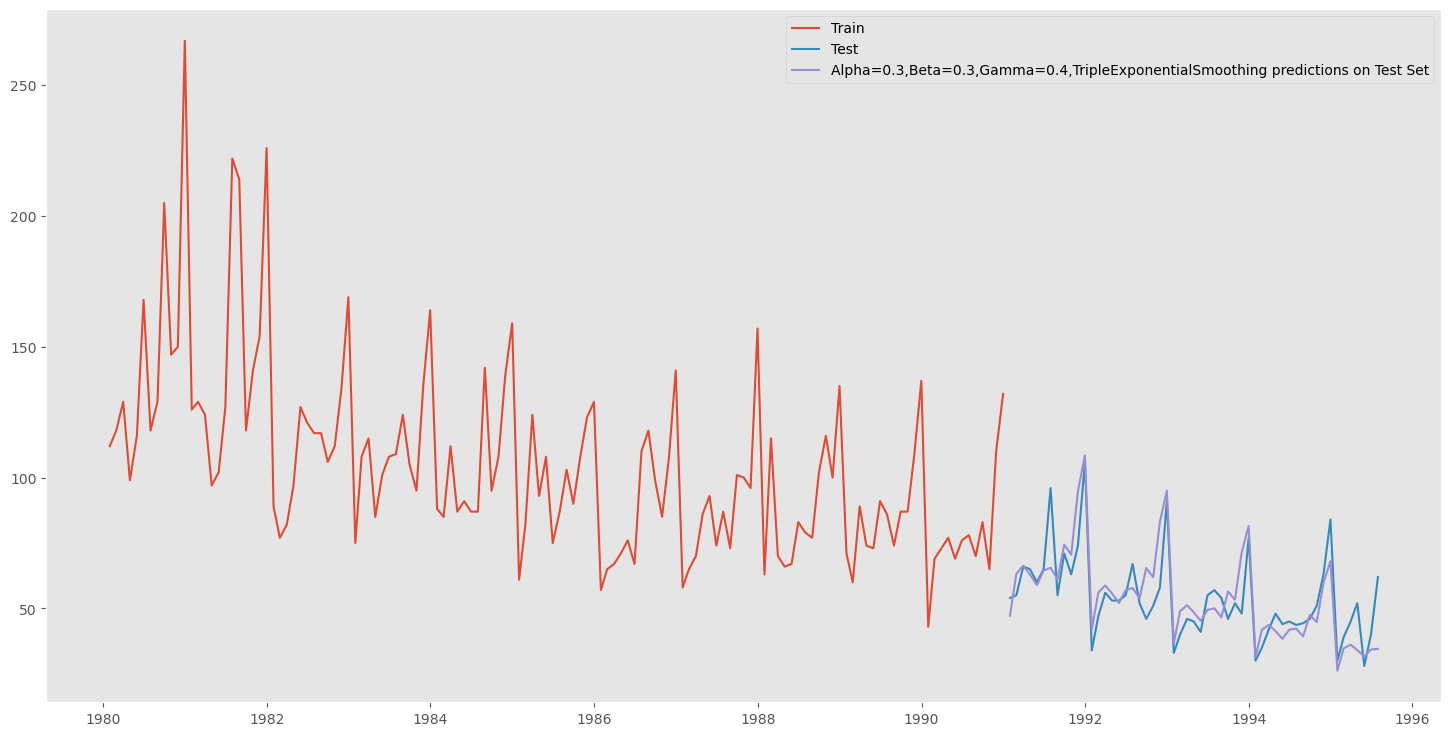

In [144]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')


plt.plot(TES_test['predict', 0.3, 0.3, 0.4], 
         label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [145]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf.round(0)

,Test RMSE
RegressionOnTime,51.0
NaiveModel,80.0
SimpleAverageModel,54.0
2pointTrailingMovingAverage,12.0
4pointTrailingMovingAverage,14.0
6pointTrailingMovingAverage,15.0
9pointTrailingMovingAverage,15.0
"Alpha=0.098,SimpleExponentialSmoothing",37.0
"Alpha=0.3,SimpleExponentialSmoothing",48.0
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",266.0


In [146]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE']).round(0)

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing",10.0
2pointTrailingMovingAverage,12.0
4pointTrailingMovingAverage,14.0
6pointTrailingMovingAverage,15.0
9pointTrailingMovingAverage,15.0
"Alpha=0.07,Beta=0.04,Gamma=0,TripleExponentialSmoothing",20.0
"Alpha=0.098,SimpleExponentialSmoothing",37.0
"Alpha=0.3,SimpleExponentialSmoothing",48.0
RegressionOnTime,51.0
SimpleAverageModel,54.0


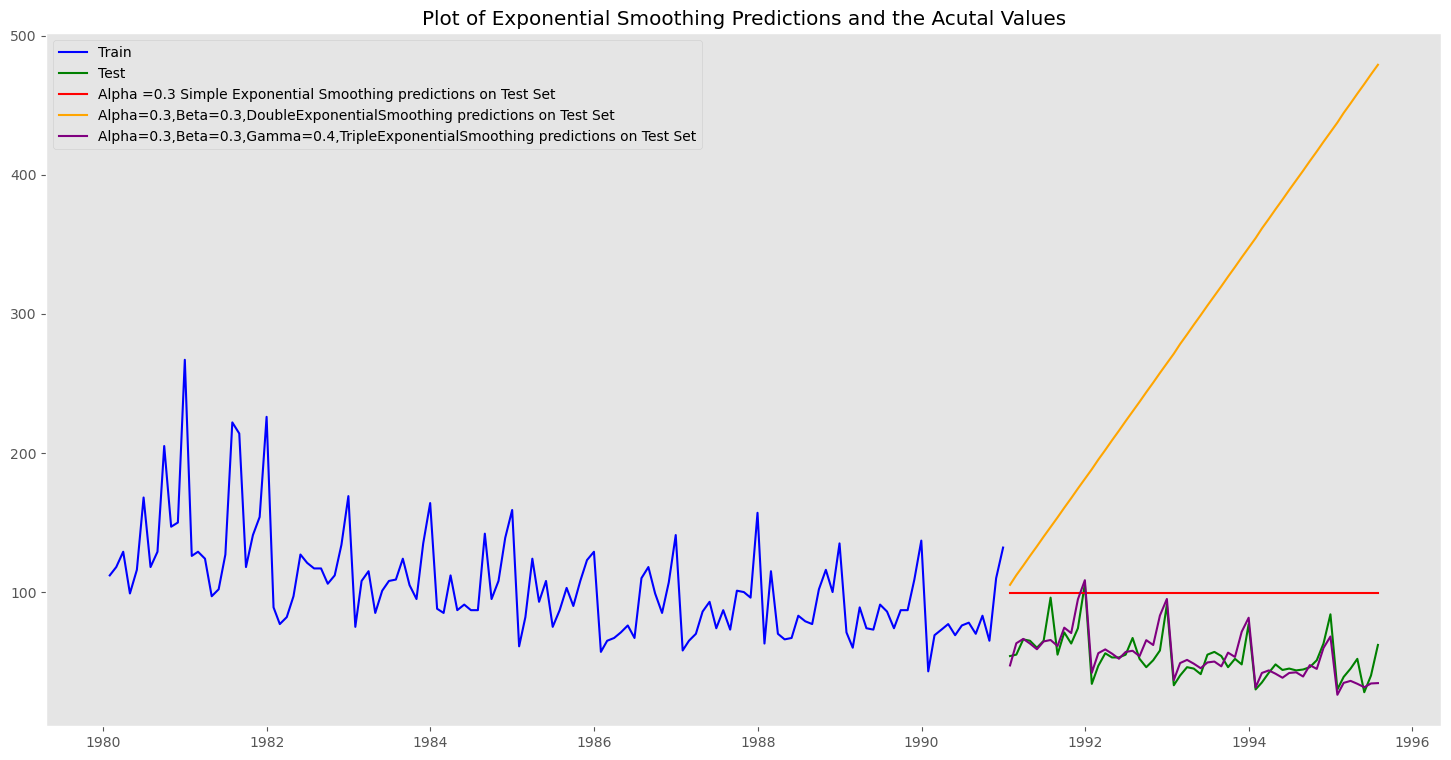

In [147]:
## Plotting on both the Training and Test data and comparing the 3 exponential models

# from turtle import color


plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train', color='blue')
plt.plot(test['Rose'], label='Test', color='green')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set', color='red')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set',color='orange')

plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set',color='purple')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

# Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
​
​

## Check for stationarity of the whole Time Series data.

In [148]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller

In [149]:
df1.columns

Index(['Rose'], dtype='object')

In [150]:
adfuller(df1['Rose'])[1]

0.344736753650672

In [151]:
#Perform Dickey-Fuller test: Ho : There is no stationarity

# Formatting the output

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df1['Rose'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -1.873273
p-value                          0.344737
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [152]:
# Let us take a difference of order 1 and check whether the Time Series is stationary or not.
df1['Rose'].diff()

Date
1980-01-31     NaN
1980-02-29     6.0
1980-03-31    11.0
1980-04-30   -30.0
1980-05-31    17.0
              ... 
1995-03-31     6.0
1995-04-30     7.0
1995-05-31   -24.0
1995-06-30    12.0
1995-07-31    22.0
Freq: M, Name: Rose, Length: 187, dtype: float64

In [153]:
adfuller(df1['Rose'].diff().dropna())[1] # d -->1

1.8216039932463435e-12

We see that at 𝛼 = 0.05 the Time Series is indeed stationary as the p-value is lower than 0.05 and hence we can reject the null hypothesis which says that the time series is not stationary. So differentiation by 1 makes the time series stationary.

#  Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Autocorrelation & Partial Autocorrelation function

In [154]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [155]:
df1.columns

Index(['Rose'], dtype='object')

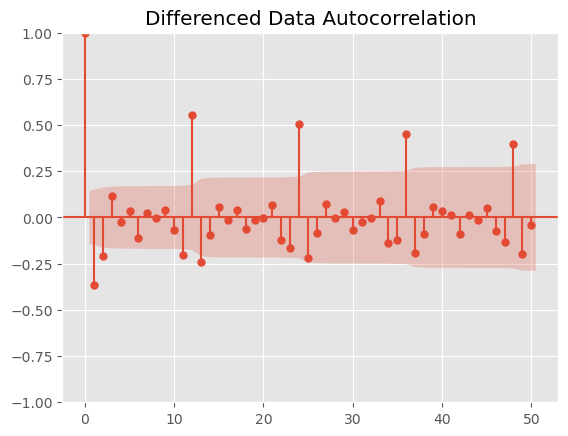

In [156]:
plot_acf(df1['Rose'].diff().dropna(),
         lags=50,
         title='Differenced Data Autocorrelation');

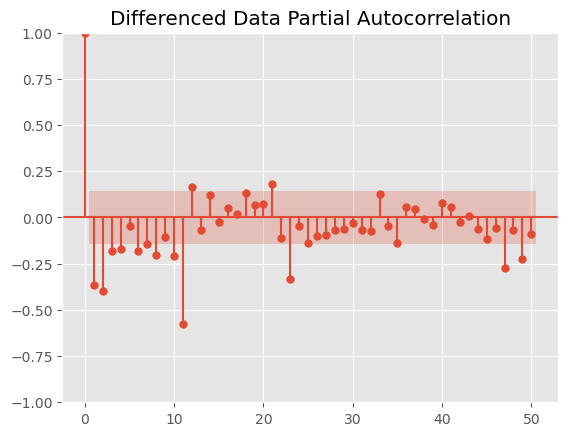

In [157]:
plot_pacf(df1['Rose'].diff().dropna(),
          lags=50,
          title='Differenced Data Partial Autocorrelation');

## Check for stationarity of the Training Data Time Series.

In [158]:
adfuller(train['Rose'])[1] # gives p-value

0.2194756412907245

In [159]:
adfuller(train['Rose'].diff().dropna())[1]

7.061943750943291e-09

## Automated version of an ARIMA model : Based on lowest Akaike Information Criteria (AIC).

In [160]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we already know that we need to take a first order difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)  

pdq = list(itertools.product(p, d, q))

print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print(f'Model: {pdq[i]}')

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [161]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [162]:
from statsmodels.tsa.arima.model import ARIMA # statsmodels.tsa.arima_model

In [163]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'],
                        order=param).fit()
    
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 
                                'AIC': ARIMA_model.aic},
                               ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.671528853576
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.574229538005
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341605
ARIMA(2, 1, 1) - AIC:1281.507862186848
ARIMA(2, 1, 2) - AIC:1281.87072222647


In [164]:
ARIMA_AIC

,param,AIC
0,"(0, 1, 0)",1333.154673
1,"(0, 1, 1)",1282.309832
2,"(0, 1, 2)",1279.671529
3,"(1, 1, 0)",1317.350311
4,"(1, 1, 1)",1280.574230
5,"(1, 1, 2)",1279.870723
6,"(2, 1, 0)",1298.611034
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722


In [165]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [166]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

results_auto_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 25 Dec 2022   AIC                           1279.672
Time:                        14:35:53   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.000     792.766    1138.915
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                39.24
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set & Evaluation - Auto Arima Model

In [167]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [168]:
predicted_auto_ARIMA

1991-01-31    96.026636
1991-02-28    87.495114
1991-03-31    87.495114
1991-04-30    87.495114
1991-05-31    87.495114
1991-06-30    87.495114
1991-07-31    87.495114
1991-08-31    87.495114
1991-09-30    87.495114
1991-10-31    87.495114
1991-11-30    87.495114
1991-12-31    87.495114
1992-01-31    87.495114
1992-02-29    87.495114
1992-03-31    87.495114
1992-04-30    87.495114
1992-05-31    87.495114
1992-06-30    87.495114
1992-07-31    87.495114
1992-08-31    87.495114
1992-09-30    87.495114
1992-10-31    87.495114
1992-11-30    87.495114
1992-12-31    87.495114
1993-01-31    87.495114
1993-02-28    87.495114
1993-03-31    87.495114
1993-04-30    87.495114
1993-05-31    87.495114
1993-06-30    87.495114
1993-07-31    87.495114
1993-08-31    87.495114
1993-09-30    87.495114
1993-10-31    87.495114
1993-11-30    87.495114
1993-12-31    87.495114
1994-01-31    87.495114
1994-02-28    87.495114
1994-03-31    87.495114
1994-04-30    87.495114
1994-05-31    87.495114
1994-06-30    87

In [169]:
from statsmodels.tools.eval_measures import rmse

# predicted_auto_ARIMA[0] contains the predictions(mean values)
RMSE_autoarima = rmse(test['Rose'],predicted_auto_ARIMA[0])
print(RMSE_autoarima)

45.0823106733865


In [170]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [RMSE_autoarima]},
                         index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


## Automated version of a SARIMA model -Parameter Selection with lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameters PDQ for the SARIMA model.

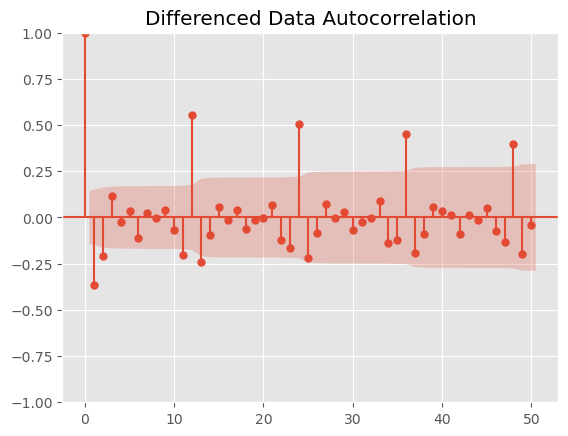

In [171]:
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');

We see that there can be a seasonality of 6 and 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

## Auto SARIMA model - With Seasonality as 6

In [172]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] # seasonal PDQ
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print(f'Model: {pdq[i]}{model_pdq[i]}')

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [173]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [174]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [175]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(train['Rose'],order=param, 
                               seasonal_order = param_seasonal,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,
                                        'seasonal':param_seasonal, 
                                        'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827292
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149186
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326672189
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515272
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224425842518
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029543
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745042
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253745756
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564122035198
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.749037998229
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189438352
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082622135
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [176]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220399
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [177]:
# Now build a SARIMA model using the pdq and PDQ values identified above
auto_SARIMA_6 =SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
results_auto_SARIMA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 25 Dec 2022   AIC                           1041.656
Time:                                   14:36:44   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.151     -3.923      0.000      -0.891      -0.297
ma.L1         -0.1953    261.436     -0.001      0.999    -512.600     512.209
ma.L2         -0.8046    210.323     -0.004      0.997    -413.030     411.421
ar.S.L6       -0.0626      0.035     -1.787      0.074      -0.131       0.006
ar.S.L12       0.8451      0.039     21.927      0.000       0.770       0.921
ma.S.L6        0.2226    261.363      0.001      0.999    -512.040     512.485
ma.S.L12      -0.7774    203.233     -0.004      0.997    -399.107     397.552
sigma2       335.2094      1.236    271.114      0.000     332.786     337.633
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                56.67
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.52
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.2e+21. Standard errors may be unstable.
"""

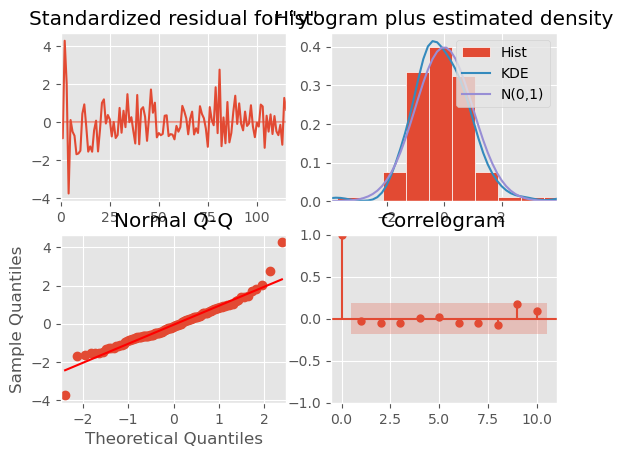

In [178]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Prediction on the Test Set & Evaluation

In [179]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [180]:
predicted_auto_SARIMA_6

In [181]:
predicted_auto_SARIMA_6.predicted_mean

array([ 62.84269188,  67.63139573,  74.74736307,  71.32642878,
        76.01825574,  75.03603782,  81.18532502,  84.19166918,
        83.66608132,  83.85058019,  90.20431947, 108.57054805,
        65.68280256,  67.24782576,  74.65640745,  70.94480867,
        74.99282423,  72.72842037,  80.77729052,  83.11918933,
        82.27142168,  82.6239776 ,  87.76110052, 103.4106312 ,
        66.67220815,  67.84381426,  74.16010974,  71.00000146,
        74.10036005,  71.20731726,  80.30752273,  82.21306512,
        81.10165811,  81.59719763,  85.74443183,  99.15004808,
        67.53492416,  68.40578285,  73.81290969,  71.11145258,
        73.47198907,  70.18863077,  79.85645589,  81.41226147,
        80.13482324,  80.72256887,  84.07953447,  95.61336665,
        68.29217509,  68.9307728 ,  73.57998589,  71.26034793,
        73.04512959,  69.54902457,  79.42791105])

In [182]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.842692,18.848414,25.900480,99.784904
1,67.631396,19.300164,29.803769,105.459023
2,74.747363,19.412720,36.699130,112.795596
3,71.326429,19.475673,33.154810,109.498047
4,76.018256,19.483956,37.830403,114.206108


In [183]:
rmse_autosarima6 =rmse(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)
print(rmse_autosarima6)

26.209980751250267


In [184]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_autosarima6]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


## Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [185]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print(f'Model: {pdq[i]}{model_pdq[i]}')

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [186]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [187]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train['Rose'],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,
                                        'seasonal':param_seasonal ,
                                        'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207266
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386234
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752637
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069755
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945504
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383734
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918212
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947183
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483301813
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535848
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461669
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261287692
SARIMA(0, 1, 2)x(0, 0,

In [188]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.905125
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [189]:
auto_SARIMA_12 =SARIMAX(train['Rose'],
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

results_auto_SARIMA_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 25 Dec 2022   AIC                            887.938
Time:                                    14:38:13   BIC                            906.448
Sample:                                01-31-1980   HQIC                           895.437
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.541     -0.004      0.996    -372.337     370.651
ma.L2         -0.1573     29.778     -0.005      0.996     -58.521      58.206
ar.S.L12       0.3467      0.079      4.375      0.000       0.191       0.502
ar.S.L24       0.3023      0.076      3.996      0.000       0.154       0.451
ma.S.L12       0.0767      0.133      0.577      0.564      -0.184       0.337
ma.S.L24      -0.0726      0.146     -0.498      0.618      -0.358       0.213
sigma2       251.3136   4.76e+04      0.005      0.996   -9.31e+04    9.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.75   Prob(JB):                         0.31
Heteroskedasticity (H):               0.88   Skew:                             0.37
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

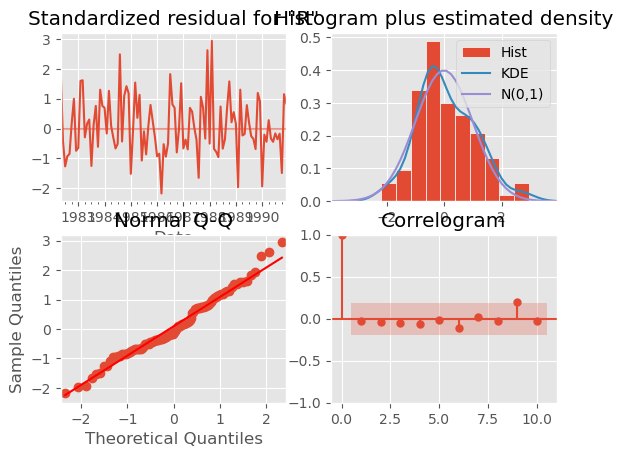

In [190]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set & Evaluation

In [191]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [192]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,62.867262,15.928500,31.647975,94.086548
1991-02-28,70.541190,16.147658,38.892362,102.190017
1991-03-31,77.356410,16.147656,45.707587,109.005233
1991-04-30,76.208813,16.147656,44.559990,107.857637
1991-05-31,72.747397,16.147656,41.098574,104.396220


In [193]:
rmse_autosarima12 = rmse(test['Rose'],
                         predicted_auto_SARIMA_12.predicted_mean)
print(rmse_autosarima12)

26.99203704228916


In [194]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_autosarima12]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


#  Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Manual ARIMA model - Using ACF & PACF plots

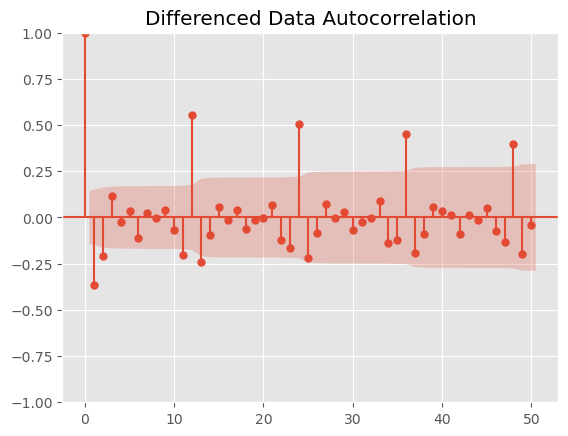

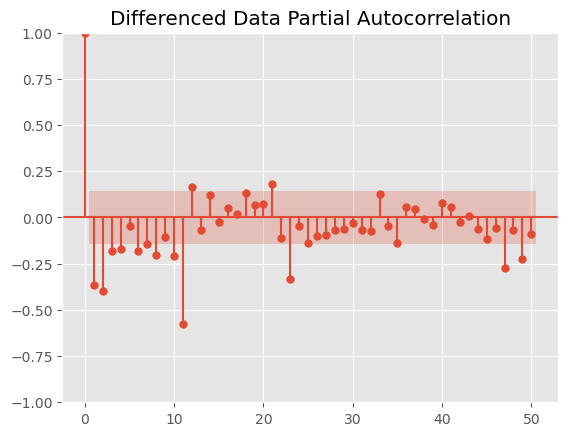

In [195]:
plot_acf(df1['Rose'].diff().dropna(),
         lags=50,
         title='Differenced Data Autocorrelation');
plot_pacf(df1['Rose'].diff().dropna(),
          lags=50,
          title='Differenced Data Partial Autocorrelation');

#### Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2. By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 4 and 2. So,our pdq values are 4,1,2.

In [196]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Sun, 25 Dec 2022   AIC                           1285.718
Time:                        14:38:15   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

## Predict on the Test Set & Evaluation

In [197]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [198]:
from statsmodels.tools.eval_measures import rmse
RMSE_manualarima = rmse(test['Rose'],
                        predicted_manual_ARIMA)
RMSE_manualarima

37.09983854487632

In [199]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['manualARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


## Manual SARIMA model Setting the seasonality as 6- Using ACF & PACF plots

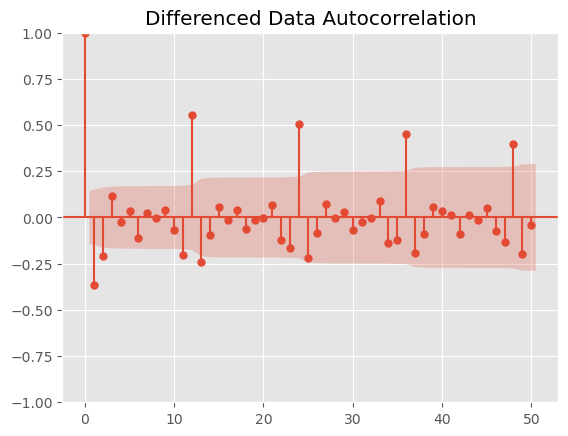

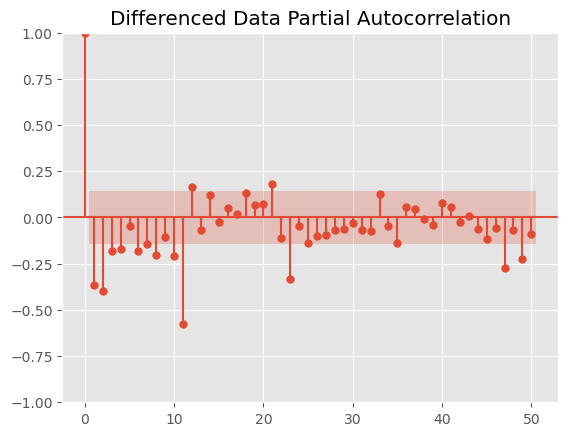

In [200]:
plot_acf(df1['Rose'].diff().dropna(),
         lags=50,
         title='Differenced Data Autocorrelation');
plot_pacf(df1['Rose'].diff().dropna(),
          lags=50,
          title='Differenced Data Partial Autocorrelation');

In [201]:
manual_SARIMA_6 =SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
results_manual_SARIMA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -508.444
Date:                           Sun, 25 Dec 2022   AIC                           1038.887
Time:                                   14:38:18   BIC                           1069.082
Sample:                                        0   HQIC                          1051.143
                                           - 132                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5878      0.243     -2.416      0.016      -1.065      -0.111
ar.L2         -0.0798      0.133     -0.599      0.549      -0.341       0.181
ar.L3         -0.0695      0.150     -0.463      0.644      -0.364       0.225
ar.L4         -0.0183      0.070     -0.260      0.795      -0.156       0.120
ma.L1         -0.2266    566.562     -0.000      1.000   -1110.667    1110.214
ma.L2         -0.7735    438.127     -0.002      0.999    -859.487     857.940
ar.S.L6       -0.0645      0.038     -1.691      0.091      -0.139       0.010
ar.S.L12       0.8427      0.040     21.000      0.000       0.764       0.921
ma.S.L6        0.2181   1272.765      0.000      1.000   -2494.355    2494.791
ma.S.L12      -0.7819    995.265     -0.001      0.999   -1951.465    1949.901
sigma2       334.8079   4.55e+05      0.001      0.999   -8.92e+05    8.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.26
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.53
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.42e+14. Standard errors may be unstable.
"""

## Predict on the Test Set & Evaluation

In [202]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [203]:
predicted_manual_SARIMA_6

In [204]:
predicted_manual_SARIMA_6.predicted_mean

array([ 62.28581485,  66.38006003,  74.73523299,  71.34397064,
        76.1197476 ,  74.53644237,  81.42327961,  83.85030848,
        83.4701822 ,  84.15073121,  90.00145241, 108.0804783 ,
        65.94762583,  67.75511239,  74.95254558,  70.91597368,
        75.01058493,  72.35514038,  81.00901167,  82.86219155,
        82.11377089,  82.92606073,  87.60478013, 103.00407265,
        66.94505966,  68.34639263,  74.46104473,  71.00640256,
        74.15531204,  70.92367629,  80.54314938,  82.01428472,
        80.98906224,  81.89647025,  85.63593577,  98.8211178 ,
        67.81422304,  68.90015994,  74.11900396,  71.14929563,
        73.56150249,  69.98742159,  80.09444491,  81.2640621 ,
        80.06335281,  81.0196437 ,  84.01514807,  95.35665265,
        68.57560198,  69.41522093,  73.89051006,  71.32629117,
        73.16570283,  69.42202524,  79.66719891])

In [205]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.285815,18.840877,25.358375,99.213255
1,66.380060,19.201090,28.746615,104.013505
2,74.735233,19.477129,36.560761,112.909705
3,71.343971,19.488603,33.147010,109.540931
4,76.119748,19.485284,37.929292,114.310203


In [206]:
rmse_manualsarima6 =rmse(test['Rose'],predicted_manual_SARIMA_6.predicted_mean)
print(rmse_manualsarima6)

26.262238303838473


In [207]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manualsarima6]}
                           ,index=['manualSARIMA(4,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


## Manual SARIMA model Setting the seasonality as 12- Using ACF & PACF plots

In [208]:
manual_SARIMA_12 =SARIMAX(train['Rose'],
                                order=(4, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)

results_manual_SARIMA_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -430.838
Date:                            Sun, 25 Dec 2022   AIC                            883.675
Time:                                    14:38:22   BIC                            912.657
Sample:                                01-31-1980   HQIC                           895.414
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7462      0.316     -2.364      0.018      -1.365      -0.128
ar.L2          0.0188      0.161      0.117      0.907      -0.297       0.335
ar.L3         -0.0733      0.139     -0.526      0.599      -0.347       0.200
ar.L4         -0.0589      0.082     -0.716      0.474      -0.220       0.102
ma.L1         -0.1275    978.031     -0.000      1.000   -1917.032    1916.777
ma.L2         -0.8725    853.331     -0.001      0.999   -1673.370    1671.625
ar.S.L12       0.3440      0.078      4.426      0.000       0.192       0.496
ar.S.L24       0.2895      0.074      3.923      0.000       0.145       0.434
ma.S.L12       0.1141      0.159      0.719      0.472      -0.197       0.425
ma.S.L24      -0.0561      0.151     -0.373      0.709      -0.351       0.239
sigma2       241.7200   2.36e+05      0.001      0.999   -4.63e+05    4.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.83   Prob(JB):                         0.28
Heteroskedasticity (H):               0.73   Skew:                             0.38
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set & Evaluation

In [209]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [210]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,62.867262,15.928500,31.647975,94.086548
1991-02-28,70.541190,16.147658,38.892362,102.190017
1991-03-31,77.356410,16.147656,45.707587,109.005233
1991-04-30,76.208813,16.147656,44.559990,107.857637
1991-05-31,72.747397,16.147656,41.098574,104.396220


In [211]:
rmse_manualsarima12 = rmse(test['Rose'],
                         predicted_manual_SARIMA_12.predicted_mean)
print(rmse_manualsarima12)

27.669494583964223


In [212]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manualsarima12]}
                           ,index=['manualSARIMA(4,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


#  Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [213]:
resultsDf


,Test RMSE
RegressionOnTime,51.486843
NaiveModel,79.778066
SimpleAverageModel,53.521557
2pointTrailingMovingAverage,11.530180
4pointTrailingMovingAverage,14.462330
6pointTrailingMovingAverage,14.586916
9pointTrailingMovingAverage,14.740112
"Alpha=0.098,SimpleExponentialSmoothing",36.763739
"Alpha=0.3,SimpleExponentialSmoothing",48.000000
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.639892


In [214]:
resultsDf.sort_values(by=['Test RMSE']).round(0)

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing",10.0
2pointTrailingMovingAverage,12.0
4pointTrailingMovingAverage,14.0
6pointTrailingMovingAverage,15.0
9pointTrailingMovingAverage,15.0
"Alpha=0.07,Beta=0.04,Gamma=0,TripleExponentialSmoothing",20.0
"SARIMA(1,1,2)(2,0,2,6)",26.0
"manualSARIMA(4,1,2)(2,0,2,6)",26.0
"SARIMA(0,1,2)(2,0,2,12)",27.0
"manualSARIMA(4,1,2)(2,0,2,12)",28.0


#  Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building the most optimum model on the Full Data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters 𝛼 = 0.3, 𝛽 = 0.3 and 𝛾 = 0.4.

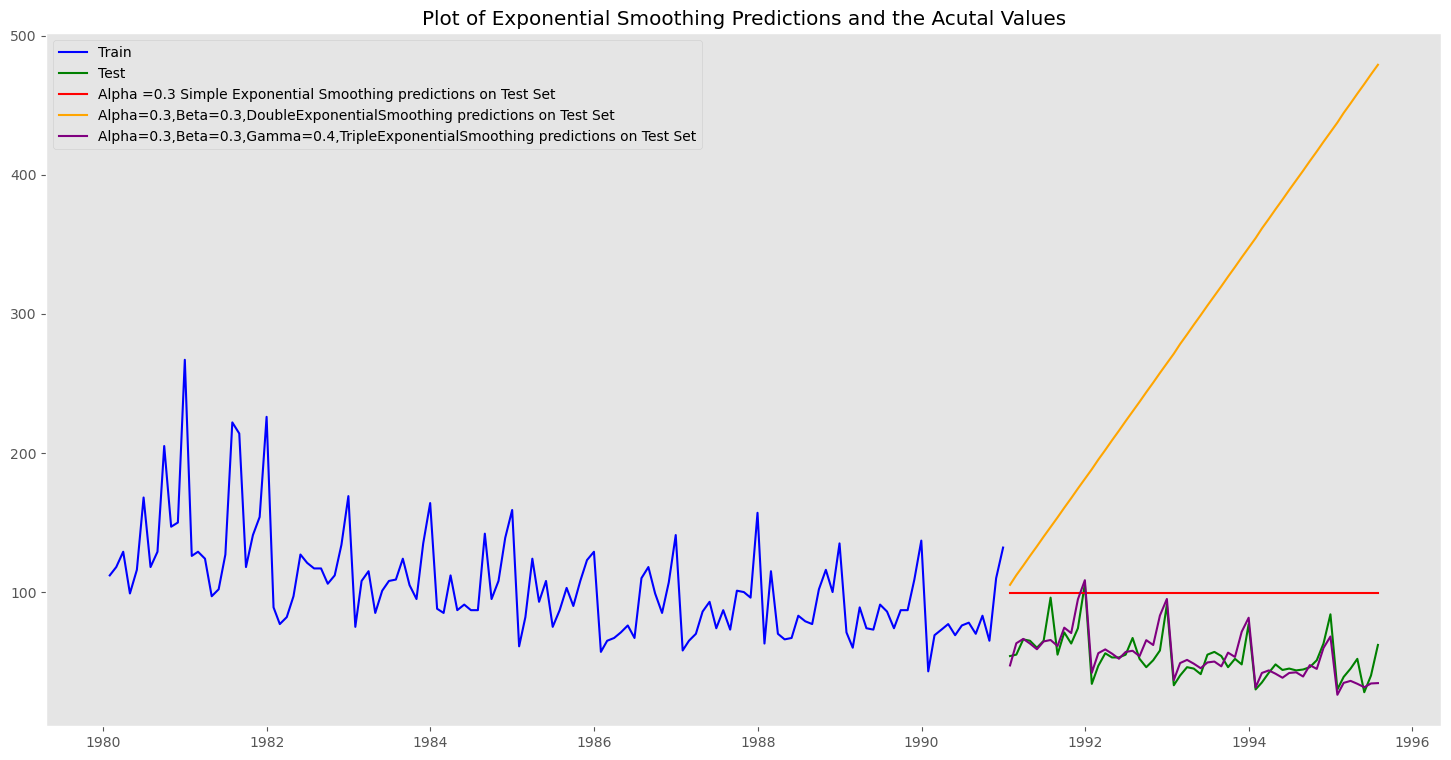

In [215]:
## Plotting on both the Training and Test data and comparing the 3 exponential models

# from turtle import color


plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train', color='blue')
plt.plot(test['Rose'], label='Test', color='green')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set', color='red')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set',color='orange')

plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set',color='purple')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [216]:
fullmodel1 = ExponentialSmoothing(df1,trend='additive',seasonal='multiplicative')
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.4)

## Evaluate the model on the whole and predict 12 months into the future.

In [217]:
# Getting the predictions for 12 months 
prediction_1 = fullmodel1.forecast(steps=12)

In [218]:
RMSE_fullmodel1 = rmse(df1['Rose'],
                       fullmodel1.fittedvalues)

RMSE_fullmodel1

21.020471957698383

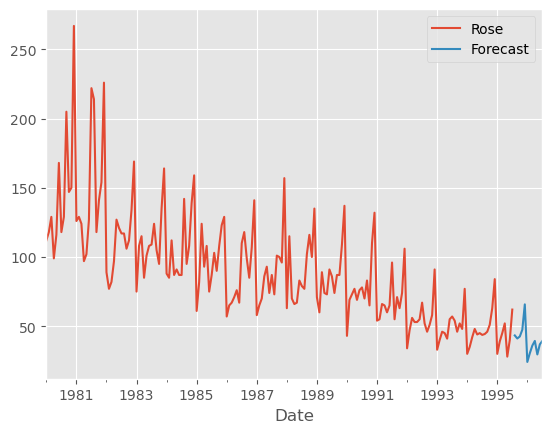

In [219]:
df1.plot(legend  = True, label = 'Actual')
prediction_1.plot(legend = True, label = 'Forecast');

## Prediction Confidence Intervals : Margin of Error

In [220]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level.Here we are taking the multiplier to be 1.96 since in a normal distribution( as the residual should be if you have done the modelling properly,), 95% of values lie within +/- 1.96 sigma of the mean

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*fullmodel1.resid.std(),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*fullmodel1.resid.std()}).round(0)
pred_1_df

,lower_CI,prediction,upper_ci
1995-08-31,2.0,43.0,85.0
1995-09-30,-0.0,41.0,82.0
1995-10-31,1.0,43.0,84.0
1995-11-30,6.0,47.0,89.0
1995-12-31,24.0,66.0,107.0
1996-01-31,-17.0,24.0,65.0
1996-02-29,-11.0,30.0,72.0
1996-03-31,-5.0,36.0,77.0
1996-04-30,-2.0,39.0,81.0
1996-05-31,-12.0,30.0,71.0


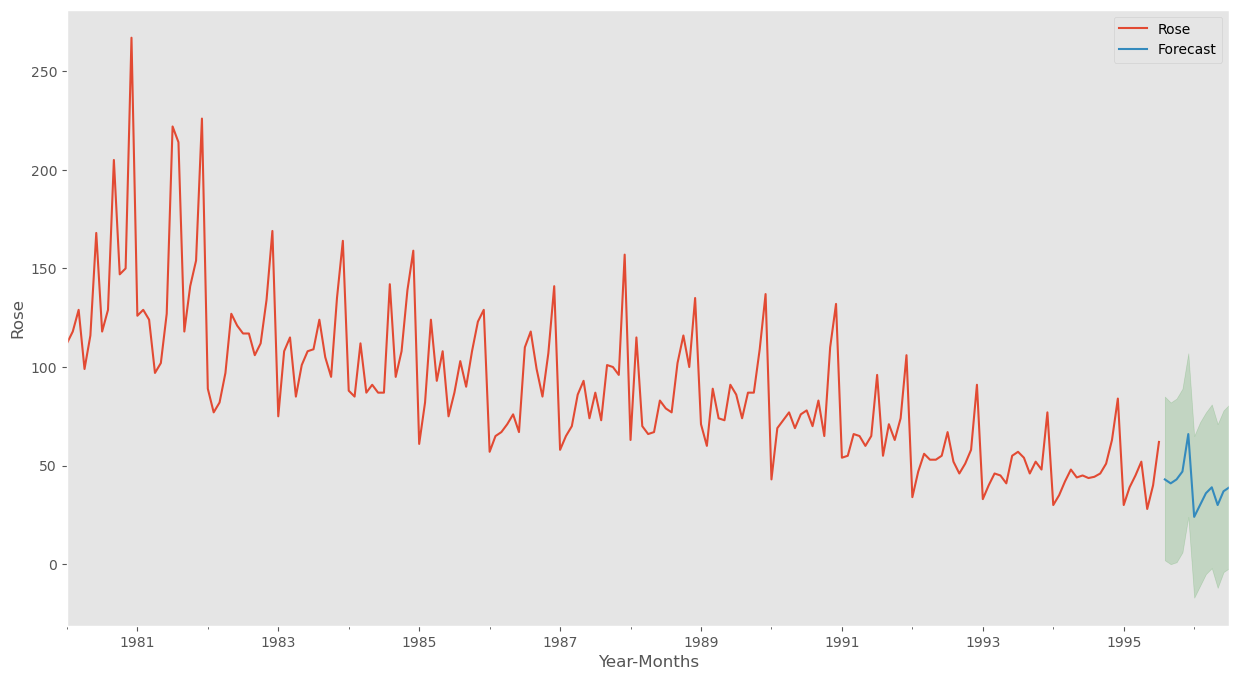

In [221]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8)) 

pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=1) 


axis.fill_between(pred_1_df.index, 
                  pred_1_df['lower_CI'], 
                  pred_1_df['upper_ci'], 
                  color='green', 
                  alpha=.15) 

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

# END